<a href="https://colab.research.google.com/github/Aryan9012004/Machine_Learning/blob/main/P6_(Gold_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold Price Prediction using Random Forest Regressor

Importing the libraries/dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Ensemble is used to improve their accuracy and performance.
from sklearn import metrics

Data Collection & Processing

In [ ]:
# loading cvs data into pandas Dataframe
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Printing last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# Additional information of DataFrame
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [ ]:
# Checking count of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Statistical measures of DataFrame
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1. Positive Correlation
2. Negetive Correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-12-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

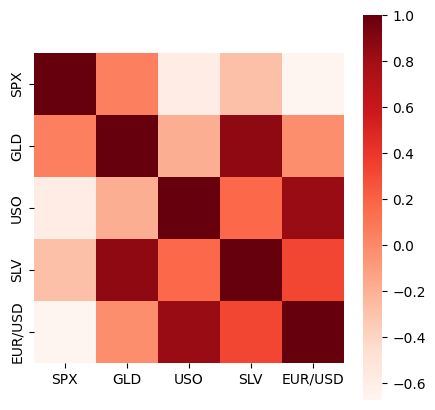

In [ ]:
# Constructing the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation , cbar=True ,square = True, fmt=".1f",annot_kws={"size":8},cmap="Reds")

# cbar(Color Bar) --> it shows how much correlated the values are
# square --> To present all the values in square shape
# fmt --> To get the values till given decimal point
# annot --> To present labels in front of their values
# annot_kws --> size of annotation
# cmap --> color of the heatmap (the Darker the color the more the corelated and vice versa)

In [18]:
# Correlaion values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-717ffc81137d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

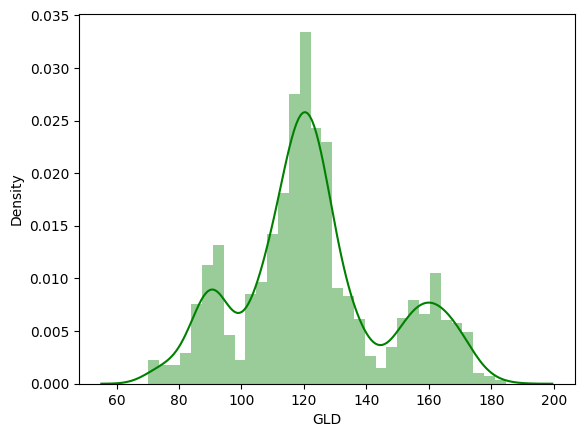

In [19]:
# Checking the distribution of GLD price
sns.distplot(gold_data['GLD'],color="green")

Splitting the features and target

In [21]:
X = gold_data.drop(["Date","GLD"],axis=1)
Y = gold_data["GLD"]

In [22]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train Test Split

In [24]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

Random forest Regressor

In [25]:
reg = RandomForestRegressor(n_estimators=100)
# n_estimators is how many trees you want in your forest.
# More trees can make better guesses, but they also take longer to grow and use more resources.
# The usual number of trees is 100, but you can change it if you want.

In [26]:
# Training the model

reg.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [27]:
# Prediction on test data

In [28]:
test_data_prediction = reg.predict(X_test)

In [30]:
print(test_data_prediction)

[168.47019973  81.90119986 116.17679974 127.59820066 120.91750082
 154.63029753 150.05919786 126.1985003  117.40959898 125.98890063
 116.67740082 172.37190092 141.29309893 168.09919874 115.12920007
 117.22040053 138.27080292 170.02920123 159.64100264 156.91549992
 155.09770042 124.97710045 176.9018987  157.2977036  125.26680027
  94.04719945  77.72070016 120.57690017 119.17689991 167.52529988
  88.12630062 125.29310034  91.10050082 117.59570043 121.21109907
 136.60740087 115.490601   115.21620066 147.80619943 107.10320109
 104.44690267  87.02389763 126.57940061 118.25370018 153.11879883
 119.83239968 108.49689995 108.10879815  93.15880021 126.97339801
  74.81630059 113.68519949 121.23619995 111.28639883 118.83399897
 120.41999931 159.69550011 169.8443007  147.22579725  86.10859881
  94.27240013  86.88299889  90.57850014 118.98520061 126.32830074
 127.44980008 169.65000024 122.2747997  117.47889922  98.23250083
 168.25100161 142.9632987  132.26630264 121.12840239 121.28409973
 119.98410

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [33]:
print(error_score)

0.9890693510082331


In [34]:
print("R squared error : ", error_score)

R squared error :  0.9890693510082331


Compare the actual value and predicted values in a plot

In [35]:
Y_test = list(Y_test)

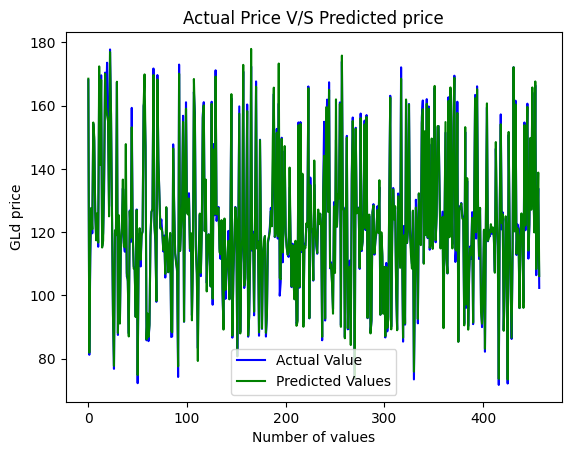

In [38]:
plt.plot(Y_test,color="blue",label = "Actual Value")
plt.plot(test_data_prediction,color="green",label = "Predicted Values")
plt.title("Actual Price V/S Predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLd price")
plt.legend() #  A legend is a box that shows the meaning of different colors or markers used in the plot.
plt.show()